# CURSO :

Analisis de la informacion de datos en R
En el siguiente cuardo se desarrollara el tema de la brecha producto por trimestres
 - Periodo: 1980q1 - 2022q3

# Importar Data

## Carga de Librerias

In [1]:
library(dplyr)
library(readr)
library(readxl)
require(openxlsx)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: openxlsx



## Ruta de carpeta

In [2]:
# Se define la informacion de una ruta de carpeta
ruta = 'D:/Dropbox/Docencia/UPN/Estadistica/Software/L1'

# Se cambia la informacion de la ruta con el comando: os.chdir()
setwd(ruta)

## Carga de Datos 

In [3]:
data = read_excel('pbi_q.xlsx')

# Medicicion de la Brechas Producto

## Uso de librerias 

In [4]:
install.packages("mFilter")
library(mFilter)

Installing package into 'C:/Users/edinson/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'mFilter' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\edinson\AppData\Local\Temp\RtmpKoWJgM\downloaded_packages


In [5]:
#?mFilter
# Transformamos en series de tiempo la data de PBI
pbi_a <- ts(data$pbi, frequency = 4, start = c(1980,1))
pbi_a

,Qtr1,Qtr2,Qtr3,Qtr4
1980,36357.48,43102.11,42344.48,45791.93
1981,39025.87,45857.89,45002.69,47014.55
1982,40474.85,46211.09,43888.80,45932.27
1983,36438.09,41011.22,39106.79,41579.90
1984,35508.36,41849.25,41510.75,44973.63
1985,39428.51,43937.53,40849.15,43003.81
1986,38202.41,46949.84,47017.48,50811.27
1987,44533.39,51060.14,51599.53,53584.94
1988,43968.85,49303.02,46027.22,42522.92
1989,35208.32,39867.60,40356.30,44003.78


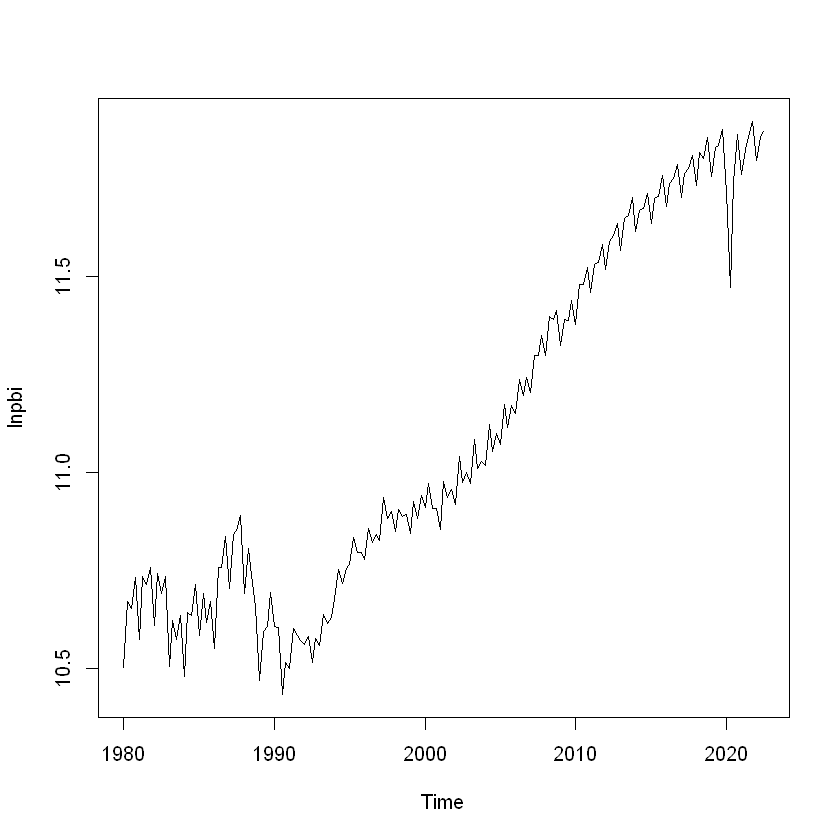

In [6]:
lnpbi <- log(pbi_a)
plot(lnpbi)

## Desestacionalizar la Series

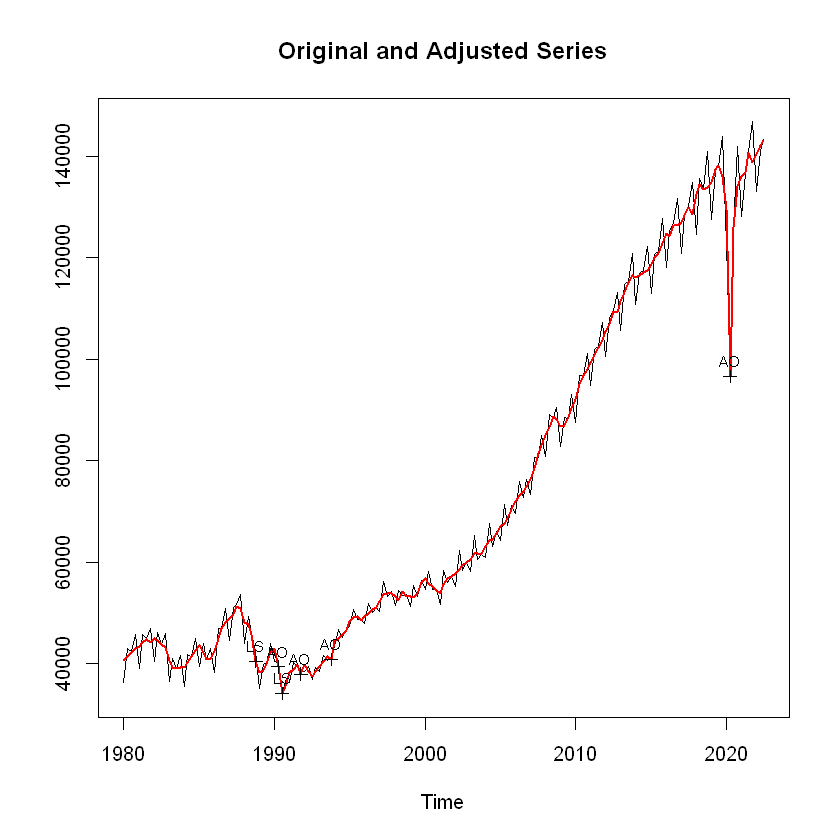

In [8]:
# desestacionalizar pbi
#install.packages("seasonal")
library(seasonal)

pbi_sa <- seas(pbi_a, x11= "")
plot(pbi_sa)


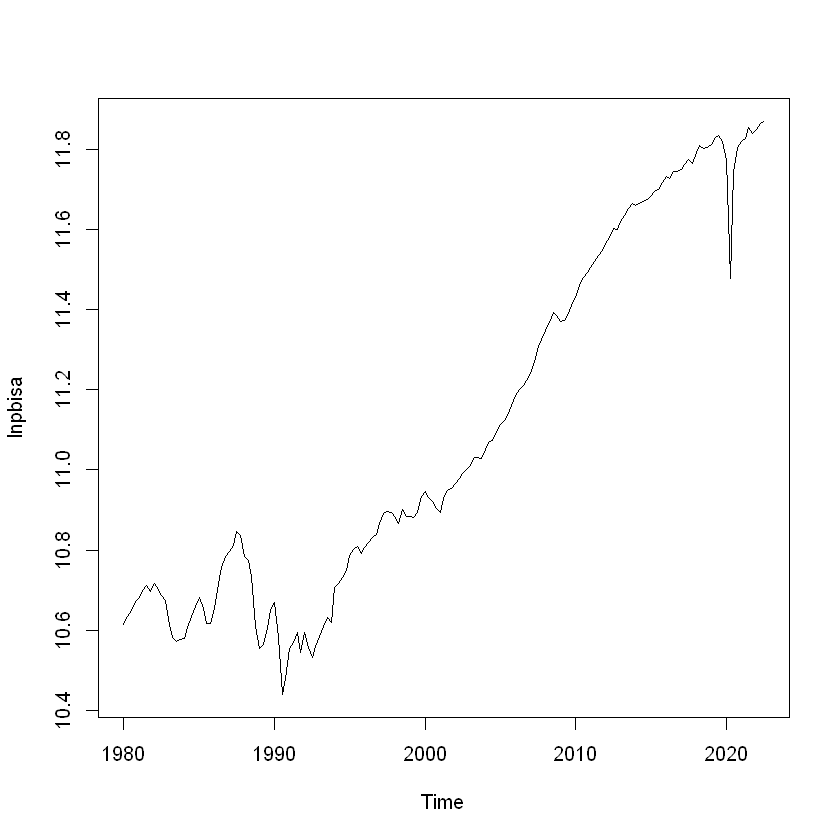

In [9]:
lnpbisa <- log(pbi_sa$data[,3]  )
plot(lnpbisa)

## Aplicacion del filtro HP

In [10]:
lnpbisa_hp <- mFilter(lnpbisa, filter="HP")
#unemp.hp <- mFilter(unemp,filter="HP")
summary(lnpbisa_hp)


Title:
 Hodrick-Prescott Filter 

Call:
 hpfilter(x = x, freq = ag$freq, type = ag$type, drift = ag$drift)

Method:
 hpfilter

Filter Type:
 lambda

Series:
 lnpbisa

Descriptive Statistics:
 
    lnpbisa          Trend           Cycle           
 Min.   :10.44   Min.   :10.59   Min.   :-0.3200773  
 1st Qu.:10.70   1st Qu.:10.67   1st Qu.:-0.0141360  
 Median :10.95   Median :10.95   Median :-0.0003189  
 Mean   :11.10   Mean   :11.10   Mean   : 0.0000000  
 3rd Qu.:11.54   3rd Qu.:11.56   3rd Qu.: 0.0235355  
 Max.   :11.87   Max.   :11.84   Max.   : 0.1550850  

In-sample error measures:
        ME        MSE        MAE        MPE       MAPE 
-2.289e-19  2.377e-03  3.086e-02 -2.499e-05  2.830e-03 



## Extrayendo la tendencia

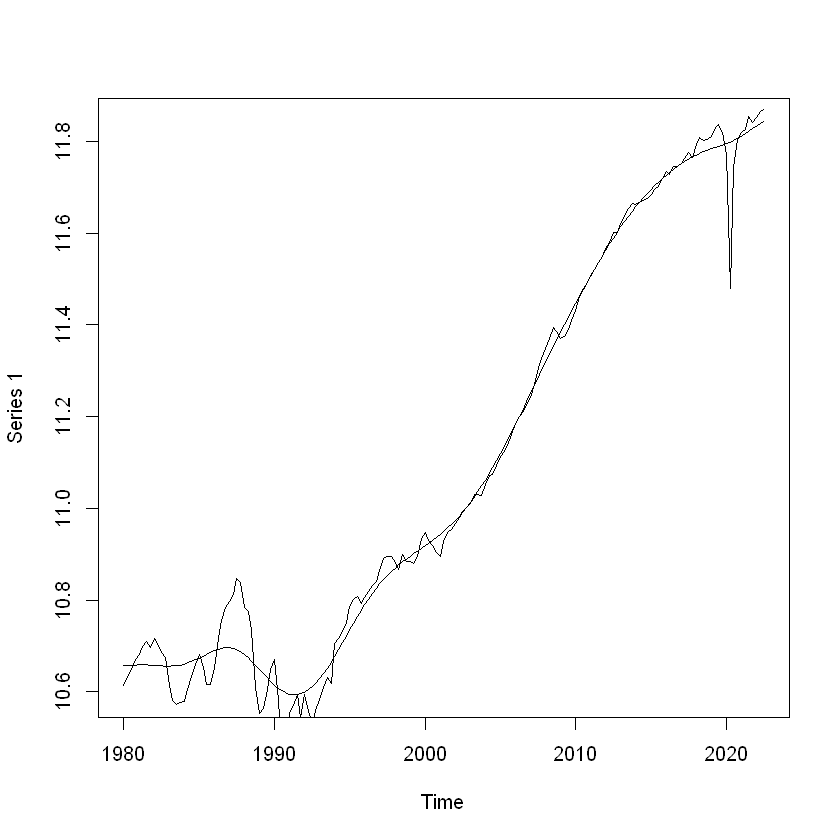

In [12]:
lnpbitend <- lnpbisa_hp$trend
plot(lnpbitend)
lines(lnpbisa)

## Calculo de la Brecha Producto

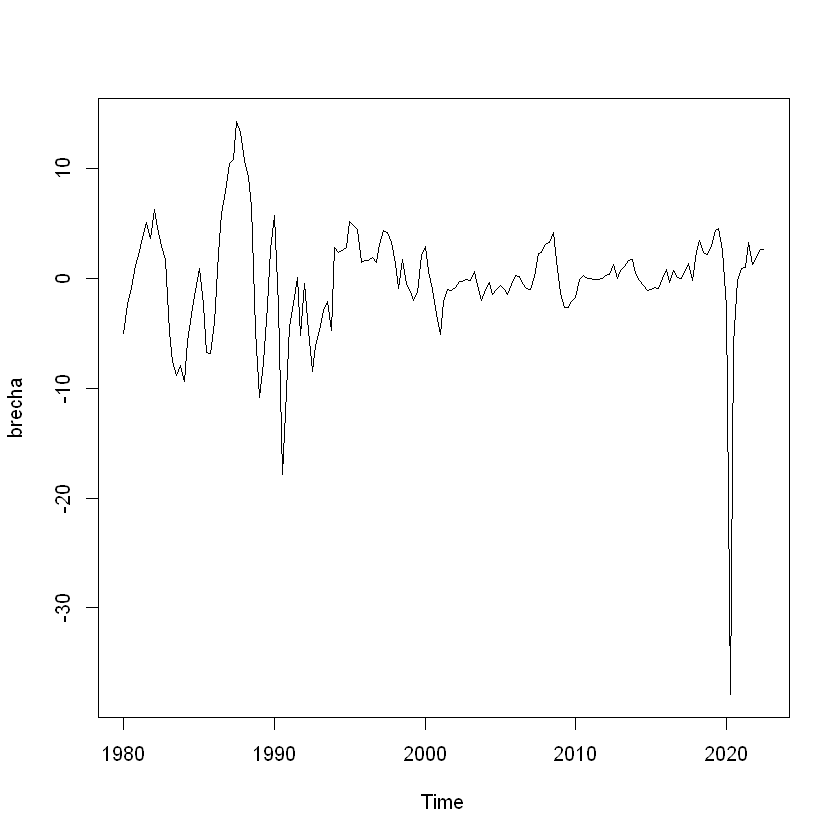

In [13]:
brecha <- exp(lnpbisa) - exp(lnpbitend)
brecha_part <- (brecha / (pbi_a) )*100
plot(brecha_part)

In [14]:
# Se agrega el calculo de la brecha a la data original
data$brecha <- as.numeric(brecha_part)

summary(data)

data %>% str()
data %>% head()


    fecha                pbi             brecha        
 Length:171         Min.   : 33935   Min.   :-37.9029  
 Class :character   1st Qu.: 44988   1st Qu.: -1.4537  
 Mode  :character   Median : 56448   Median : -0.0309  
                    Mean   : 73295   Mean   : -0.1256  
                    3rd Qu.:102164   3rd Qu.:  2.3553  
                    Max.   :146832   Max.   : 14.2979  

tibble [171 x 3] (S3: tbl_df/tbl/data.frame)
 $ fecha : chr [1:171] "T180" "T280" "T380" "T480" ...
 $ pbi   : num [1:171] 36357 43102 42344 45792 39026 ...
 $ brecha: num [1:171] -4.986 -2.406 -0.863 1.193 2.433 ...


fecha,pbi,brecha
<chr>,<dbl>,<dbl>
T180,36357.48,-4.9864046
T280,43102.11,-2.4059839
T380,42344.48,-0.8632405
T480,45791.93,1.1926728
T181,39025.87,2.4328367
T281,45857.89,3.7361968


In [29]:
data$anual <- substr(data$fecha,3,4)
data %>% head()

fecha,pbi,brecha,anual
<chr>,<dbl>,<dbl>,<chr>
T180,36357.48,-4.9864046,80
T280,43102.11,-2.4059839,80
T380,42344.48,-0.8632405,80
T480,45791.93,1.1926728,80
T181,39025.87,2.4328367,81
T281,45857.89,3.7361968,81


In [30]:
table(data$anual)


00 01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 18 19 20 21 22 80 81 82 
 4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  3  4  4  4 
83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
 4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4 

In [32]:
# Calculo de rango de fechas
data$periodo <- ifelse(data$anual=="19","2019",ifelse(data$anual=="20","2020",ifelse(data$anual=="21","2021",ifelse(data$anual=="22","2022",""))))
#data$periodo <- ifelse(data$fecha<=1990,"1980-1990",ifelse(data$fecha>1990 & data$fecha<=2000, "1991-2000",ifelse(data$fecha>2000 & data$fecha<=2010, "2001-2010","2011-2019")))
table(data$periodo)


     2019 2020 2021 2022 
 156    4    4    4    3 

In [33]:
# Estadisticas descriptivas por grupo
Tabla_brecha <- data %>% group_by(periodo) %>% summarise(Promedio = mean(brecha))
Tabla_brecha

periodo,Promedio
<chr>,<dbl>
,-0.01834498
2019,3.60340116
2020,-11.65471746
2021,1.59401147
2022,2.40646814
